In [149]:
"""
Hermawan - 2020 April
"""
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [150]:
train_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv",index_col="Id")
test_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv",index_col="Id")

In [151]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [152]:
train_data.isnull().sum()[train_data.isnull().sum()>0] 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [153]:
# Sparate data intention as y axis
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# select numerical data only for easier
X = train_data.select_dtypes(exclude=['object'])
X_test = test_data.select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [154]:
X_valid.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
530,20,NaN,32668,6,3,1957,1975,NaN,1219,0,...,484,0,0,200,0,0,0,0,3,2007
492,50,79.0,9490,6,7,1941,1950,0.0,403,165,...,240,0,0,32,0,0,0,0,8,2006
460,50,NaN,7015,5,4,1950,1950,161.0,185,0,...,352,0,0,248,0,0,0,0,7,2009
280,60,83.0,10005,7,5,1977,1977,299.0,392,0,...,505,288,117,0,0,0,0,0,3,2008
656,160,21.0,1680,6,5,1971,1971,381.0,0,0,...,264,0,0,0,0,0,0,0,3,2010


In [155]:
# Preprocessed training and validation features
imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Restore columns
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [156]:
imputed_X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,90.0,11694.0,9.0,5.0,2007.0,2007.0,452.0,48.0,0.0,...,774.0,0.0,108.0,0.0,0.0,260.0,0.0,0.0,7.0,2007.0
1,20.0,60.0,6600.0,5.0,5.0,1962.0,1962.0,0.0,0.0,0.0,...,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0
2,30.0,80.0,13360.0,5.0,7.0,1921.0,2006.0,0.0,713.0,0.0,...,432.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,8.0,2009.0
3,20.0,69.0,13265.0,8.0,5.0,2002.0,2002.0,148.0,1218.0,0.0,...,857.0,150.0,59.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0
4,20.0,118.0,13704.0,7.0,5.0,2001.0,2002.0,150.0,0.0,0.0,...,843.0,468.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0


In [157]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(imputed_X_train, y_train)

preds_validation = model.predict(imputed_X_valid)
preds_validation[:10]

array([214016.26, 149545.59, 102276.91, 222790.39,  89753.79, 108301.93,
       260967.73, 122679.41, 535948.21, 155379.12])

In [158]:
imputed_X_test = pd.DataFrame(imputer.fit_transform(X_test))

preds_test = model.predict(imputed_X_test)

In [159]:
submission = pd.DataFrame({'Id': X_test.index,'SalePrice': preds_test})


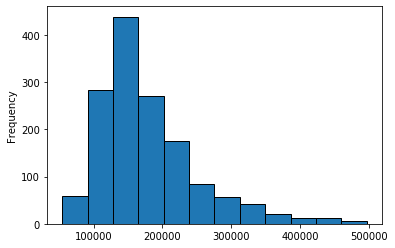

In [160]:
submission['SalePrice'].plot.hist(bins=12,edgecolor = 'black')

convert dataframe to csv for submission